[kaggle - Mobile Device Usage and User Behavior Dataset.(클릭하세요)](https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset)
* 사용자 ID: 각 사용자를 식별하는 고유 식별자입니다.
* 기기 모델: 사용자의 스마트폰 모델입니다.
* 운영 체제: 기기의 OS(iOS 또는 Android).
* 앱 사용 시간: 모바일 애플리케이션에서 소비된 일일 시간을 분 단위로 측정한 값입니다.
* 화면 켜짐 시간: 화면이 활성화된 하루의 평균 시간입니다.
* 배터리 소모: 일일 배터리 소모량(mAh)입니다.
* 설치된 앱 수: 기기에서 사용할 수 있는 총 앱 수.
* 데이터 사용량: 일일 모바일 데이터 소비량(메가바이트)입니다.
* 연령: 사용자의 연령.
* 성별: 사용자의 성별(남성 또는 여성).
* 사용자 행동 분류: 사용 패턴(1~5)에 따른 사용자 행동 분류.

In [5]:
!pip install kagglehub

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import kagglehub
import warnings
import shutil
import os


# 경고 메시지 무시
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
pd.set_option('future.no_silent_downcasting', True)

In [7]:
# 데이터 다운로드
path = kagglehub.dataset_download("valakhorasani/mobile-device-usage-and-user-behavior-dataset")

print("Path to dataset files:", path)

100%|██████████| 11.3k/11.3k [00:00<00:00, 4.67MB/s]

Extracting files...
Path to dataset files: /Users/seungbo/.cache/kagglehub/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset/versions/1


In [8]:
# 다운로드 받은 파일 현재 경로로 이동

filename = "user_behavior_dataset.csv"
src = path
dst = ""

shutil.move(os.path.join(src, filename), os.path.join(dst, filename))

'user_behavior_dataset.csv'

In [9]:
df = pd.read_csv('user_behavior_dataset.csv')
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [10]:
df = df.drop(columns=["User ID"] , axis = 1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Device Model                700 non-null    object 
 1   Operating System            700 non-null    object 
 2   App Usage Time (min/day)    700 non-null    int64  
 3   Screen On Time (hours/day)  700 non-null    float64
 4   Battery Drain (mAh/day)     700 non-null    int64  
 5   Number of Apps Installed    700 non-null    int64  
 6   Data Usage (MB/day)         700 non-null    int64  
 7   Age                         700 non-null    int64  
 8   Gender                      700 non-null    object 
 9   User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 54.8+ KB


In [12]:
# 레이블 인코딩
LabelEncoder = LabelEncoder()
df['Device Model'] = LabelEncoder.fit_transform(df['Device Model'])
df.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,0,Android,393,6.4,1872,67,1122,40,Male,4
1,1,Android,268,4.7,1331,42,944,47,Female,3
2,3,Android,154,4.0,761,32,322,42,Male,2
3,0,Android,239,4.8,1676,56,871,20,Male,3
4,4,iOS,187,4.3,1367,58,988,31,Female,3


In [13]:
# 레이블 인코딩
df['Operating System'] = LabelEncoder.fit_transform(df['Operating System'])
df.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,0,0,393,6.4,1872,67,1122,40,Male,4
1,1,0,268,4.7,1331,42,944,47,Female,3
2,3,0,154,4.0,761,32,322,42,Male,2
3,0,0,239,4.8,1676,56,871,20,Male,3
4,4,1,187,4.3,1367,58,988,31,Female,3


In [14]:
# 레이블 인코딩
df['Gender'] = LabelEncoder.fit_transform(df['Gender'])
df.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,0,0,393,6.4,1872,67,1122,40,1,4
1,1,0,268,4.7,1331,42,944,47,0,3
2,3,0,154,4.0,761,32,322,42,1,2
3,0,0,239,4.8,1676,56,871,20,1,3
4,4,1,187,4.3,1367,58,988,31,0,3


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Device Model                700 non-null    int64  
 1   Operating System            700 non-null    int64  
 2   App Usage Time (min/day)    700 non-null    int64  
 3   Screen On Time (hours/day)  700 non-null    float64
 4   Battery Drain (mAh/day)     700 non-null    int64  
 5   Number of Apps Installed    700 non-null    int64  
 6   Data Usage (MB/day)         700 non-null    int64  
 7   Age                         700 non-null    int64  
 8   Gender                      700 non-null    int64  
 9   User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.8 KB


<Axes: >

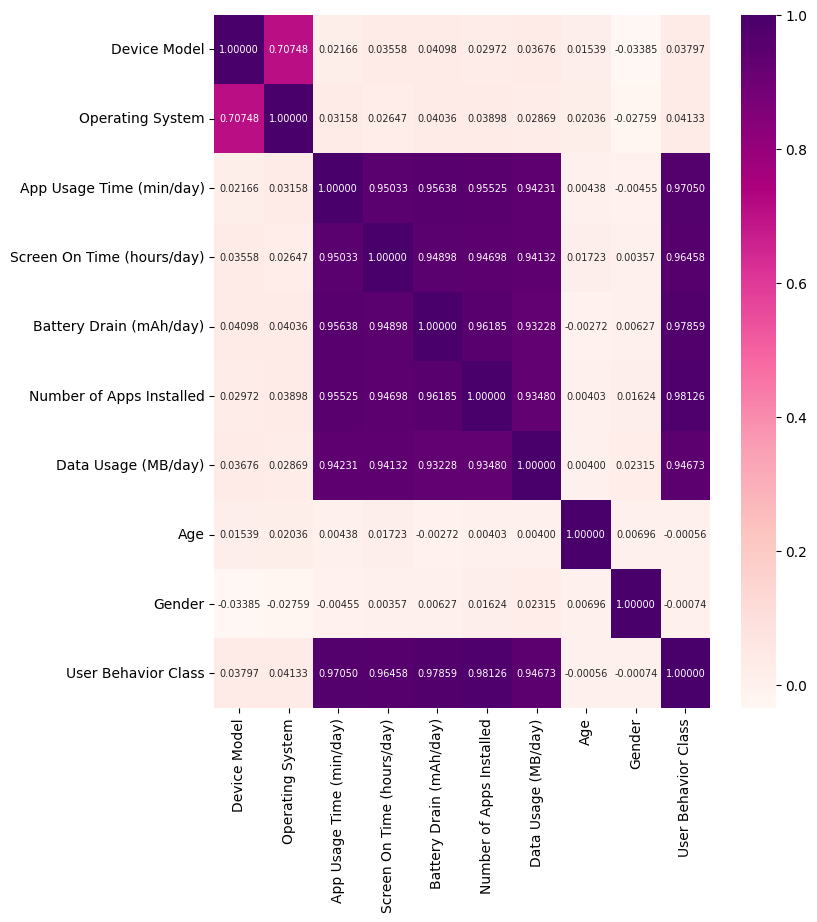

In [16]:
plt.rcParams['figure.figsize'] = (8,9)
sns.heatmap(df.corr(), annot=True, annot_kws={'size':7},
            fmt='.5f', cmap='RdPu')

<Axes: >

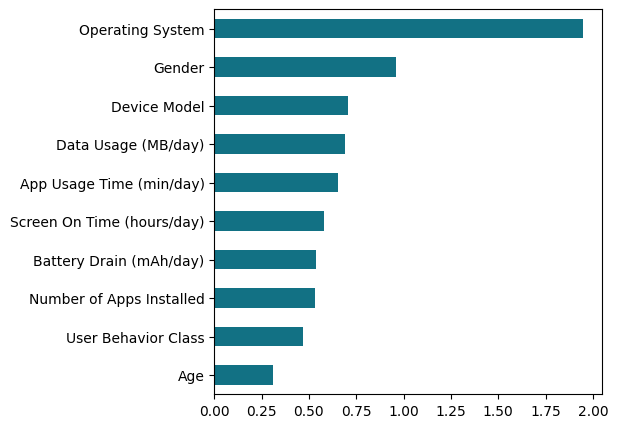

In [17]:
plt.figure(figsize=(5,5))

coefficient_of_variation = df.std(numeric_only=True) / df.mean(numeric_only=True)

sorted_cv = coefficient_of_variation.sort_values()

sorted_cv.plot.barh(x = 'Variables', y = 'Coefficient of Variation', color = '#127184')

<Axes: xlabel='Gender'>

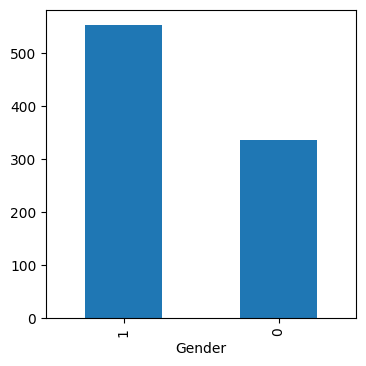

In [18]:
plt.figure(figsize=(4, 4))
df['Operating System'].value_counts().plot(kind='bar')
df['Gender'].value_counts().plot(kind='bar')

### 사전 준비

In [19]:
X = df.drop(columns = ["User Behavior Class"] , axis = 1)
y = df["User Behavior Class"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### RandomForestClassifier 이용하기

In [21]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("r2_score: ", r2)

r2_score:  1.0


In [23]:
feature_importances = model.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

Device Model: 0.0004
Operating System: 0.0000
App Usage Time (min/day): 0.2557
Screen On Time (hours/day): 0.1130
Battery Drain (mAh/day): 0.2282
Number of Apps Installed: 0.2027
Data Usage (MB/day): 0.1989
Age: 0.0010
Gender: 0.0002


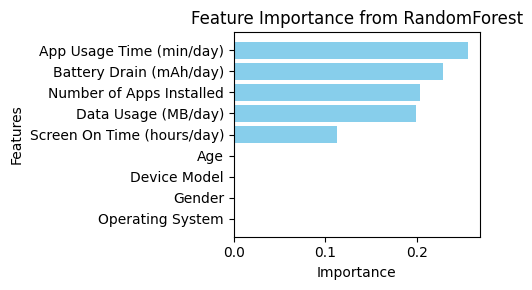

In [24]:
# 특성 중요도 정렬
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 시각화
plt.figure(figsize=(5, 3))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from RandomForest')
plt.gca().invert_yaxis()  # 중요도가 높은 순으로 정렬
plt.tight_layout()
plt.show()

In [25]:
model = RandomForestClassifier(n_estimators=2, max_depth=2, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=2, random_state=42)

In [26]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("r2_score: ", r2)

r2_score:  0.8937701143410346


In [27]:
feature_importances = model.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

Device Model: 0.0000
Operating System: 0.0000
App Usage Time (min/day): 0.5900
Screen On Time (hours/day): 0.0000
Battery Drain (mAh/day): 0.0000
Number of Apps Installed: 0.2566
Data Usage (MB/day): 0.1535
Age: 0.0000
Gender: 0.0000


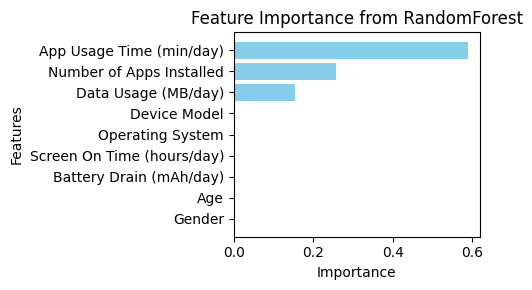

In [28]:
# 특성 중요도 정렬
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 시각화
plt.figure(figsize=(5, 3))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from RandomForest')
plt.gca().invert_yaxis()  # 중요도가 높은 순으로 정렬
plt.tight_layout()
plt.show()

#### LogisticRegression 이용하기

In [29]:
model = LogisticRegression(solver='saga', max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6642857142857143


In [30]:
# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(solver='saga', max_iter=1, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9642857142857143


#### SVC 이용하기

In [31]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 50, 100, 500, 1000],
    'gamma': [0.0005, 0.0008,1e-3, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100],
    'kernel': ['rbf']
}

# GridSearchCV로 최적 파라미터 탐색
grid = GridSearchCV(SVC(random_state=0), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 88 candidates, totalling 440 fits
[CV] END ...................C=0.01, gamma=0.0005, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.0005, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.0005, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.0005, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.0005, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.0008, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.0008, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.0008, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.0008, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.0008, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.00

GridSearchCV(cv=5, estimator=SVC(random_state=0),
             param_grid={'C': [0.01, 0.1, 1, 10, 50, 100, 500, 1000],
                         'gamma': [0.0005, 0.0008, 0.001, 0.01, 0.1, 0.5, 1, 5,
                                   10, 50, 100],
                         'kernel': ['rbf']},
             verbose=2)

In [32]:
# 최적의 파라미터와 성능 출력
print("Best Parameters:", grid.best_params_)
print("Best Cross-validation Accuracy:", grid.best_score_)

# 테스트 데이터 평가
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'C': 1, 'gamma': 0.0005, 'kernel': 'rbf'}
Best Cross-validation Accuracy: 0.9714285714285715
Test Accuracy: 0.9857142857142858
